<a href="https://colab.research.google.com/github/WoogiWooks/Kaggle_ML/blob/main/%ED%8F%89%EA%B0%80_%EB%8B%B9%EB%87%A8%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/캐글/완벽가이드 예제

/content/drive/MyDrive/캐글/완벽가이드 예제


In [ ]:
!ls

'3장. 평가'   __pycache__   Score.ipynb   score.py


In [ ]:
from score import *

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
Data = pd.read_csv('./3장. 평가/diabetes.csv')
Data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# Preg = 임신횟수
# Glucose = 포도당 수치
# BloodP = 혈압
# SkinThick = 피하지방 측정값
# Insulin = 인슐린
# BMI = 체질량지수
# Diabetes~ = 당뇨 내력 가중치 값
# Age = 나이

In [ ]:
Data.shape

(768, 9)

In [ ]:
Data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
Negative = Data["Outcome"].value_counts()[0]
Positive = Data["Outcome"].value_counts()[1]
N_ratio = Negative/(Negative+Positive)
P_ratio = Positive/(Negative+Positive)
print(N_ratio*100)
print(P_ratio*100)

65.10416666666666
34.89583333333333


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# **데이터 전처리 없이 진행시**

In [ ]:
X = Data.iloc[:, :-1]
y = Data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
classify_score(y_test, pred, pred_proba)

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
ROC: 0.7919


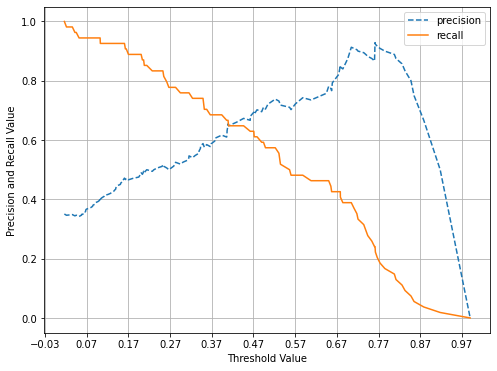

In [ ]:
pr_curve_plot(y_test, pred_proba)

In [ ]:
# 재현율에 좀 더 초점
# 임계값 조정 필요

# **데이터 전처리 진행**

In [ ]:
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

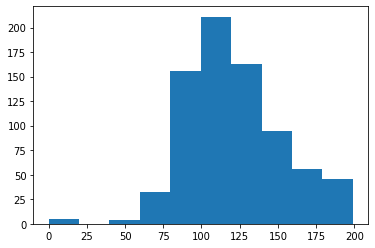

In [ ]:
# 0일수가 없는 피쳐가 존재함
# Glucose, BloodPressure, SkinThickness, Insulin, BMI

plt.hist(Data["Glucose"], bins=10)

In [ ]:
check_features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

total_count = Data["Glucose"].count()

#피쳐별 0값 비율 추출
for i in check_features:
  zero = Data[Data[i]==0][i].count()
  print("{0} 피쳐의 0 건수는 '{1}', 비율은 {2:.2f}%".format(i, zero, (zero/total_count)*100))

Glucose 피쳐의 0 건수는 '5', 비율은 0.65%
BloodPressure 피쳐의 0 건수는 '35', 비율은 4.56%
SkinThickness 피쳐의 0 건수는 '227', 비율은 29.56%
Insulin 피쳐의 0 건수는 '374', 비율은 48.70%
BMI 피쳐의 0 건수는 '11', 비율은 1.43%


In [ ]:
# 위 for문 참고용
Data[Data["Glucose"]==0].value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
6            0        68             41             0        39.0  0.727                     41   1          1
5            0        80             32             0        41.0  0.346                     37   1          1
1            0        74             20             23       27.7  0.299                     21   0          1
                      68             35             0        32.0  0.389                     22   0          1
                      48             20             0        24.7  0.140                     22   0          1
dtype: int64

In [ ]:
# 0인 값들을 평균값으로 대체

for i in check_features:
  mean = Data[i].mean()
  Data[i] = Data[i].replace(0, mean)

In [ ]:
# 재검사
for i in check_features:
  zero = Data[Data[i]==0][i].count()
  print("{0} 피쳐의 0 건수는 '{1}', 비율은 {2:.2f}%".format(i, zero, (zero/total_count)*100))

Glucose 피쳐의 0 건수는 '0', 비율은 0.00%
BloodPressure 피쳐의 0 건수는 '0', 비율은 0.00%
SkinThickness 피쳐의 0 건수는 '0', 비율은 0.00%
Insulin 피쳐의 0 건수는 '0', 비율은 0.00%
BMI 피쳐의 0 건수는 '0', 비율은 0.00%


In [ ]:
# 피처 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred_proba = lr.predict_proba(X_test)[:, 1]

In [ ]:
classify_score(y_test, pred, pred_proba)

정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
ROC: 0.8059


In [ ]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
classify_score_by_threshold(y_test, pred_proba, thresholds)

임계값: 0.3
정확도: 0.7143
정밀도: 0.5694
재현율: 0.7593
F1: 0.6508
ROC: 0.8059


임계값: 0.33
정확도: 0.7208
정밀도: 0.5873
재현율: 0.6852
F1: 0.6325
ROC: 0.8059


임계값: 0.36
정확도: 0.7273
정밀도: 0.6000
재현율: 0.6667
F1: 0.6316
ROC: 0.8059


임계값: 0.39
정확도: 0.7403
정밀도: 0.6250
재현율: 0.6481
F1: 0.6364
ROC: 0.8059


임계값: 0.42
정확도: 0.7468
정밀도: 0.6415
재현율: 0.6296
F1: 0.6355
ROC: 0.8059


임계값: 0.45
정확도: 0.7727
정밀도: 0.6939
재현율: 0.6296
F1: 0.6602
ROC: 0.8059


임계값: 0.48
정확도: 0.7857
정밀도: 0.7333
재현율: 0.6111
F1: 0.6667
ROC: 0.8059


임계값: 0.5
정확도: 0.7987
정밀도: 0.7674
재현율: 0.6111
F1: 0.6804
ROC: 0.8059


